# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from scipy import stats as st

### Месторождение 1 ###

In [2]:
geo_data_0 = pd.read_csv('geo_data_0.csv')

In [3]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
geo_data_0[geo_data_0['product'] == 0]

,id,f0,f1,f2,product
57263,zCM5W,-0.702064,0.375992,0.236572,0.0


In [6]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [7]:
geo_data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [8]:
geo_data_0.duplicated().sum()

0

In [9]:
reserve_geo_0 = geo_data_0['product'].sum()

In [10]:
print('Общий объем запасов Месторождение 1:', reserve_geo_0, 'тыс. баррелей')

Общий объем запасов Месторождение 1: 9250000.000000002 тыс. баррелей


По месторождению 1 предоставлены данные о 100 000 скважинах. Пропуски и полные дубликаты в данных отсутствуют.

Есть данные об 1 скважине, в которой объем запасов нефти равен 0. Максимальный объем запасов составляет 185.364 тыс. баррелей, средний - 92 тыс. баррелей

### Месторождение 2 ###

In [11]:
geo_data_1 = pd.read_csv('geo_data_1.csv')

In [12]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [13]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [15]:
geo_data_1[geo_data_1['product'] == 0]

,id,f0,f1,f2,product
11,OXyvW,16.320755,-0.562946,-0.001783,0.0
13,igmai,6.695604,-0.749449,-0.007630,0.0
62,Qjy5w,21.418478,-5.134490,-0.002836,0.0
63,G6WCj,6.822701,3.104979,-0.000723,0.0
77,MzQhL,6.750150,-11.893512,-0.001601,0.0
...,...,...,...,...,...
99936,YrRU8,5.085749,-3.980305,0.005063,0.0
99948,Jbnur,8.277805,-9.178818,0.003275,0.0
99956,aV1cJ,13.343983,-1.290200,0.005980,0.0
99961,Zjbn2,13.854163,-11.528089,-0.005556,0.0


In [16]:
geo_data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [17]:
geo_data_1.duplicated().sum()

0

In [18]:
reserve_geo_1 = geo_data_1['product'].sum()

In [19]:
print('Общий объем запасов Месторождение 2:', reserve_geo_1, 'тыс. баррелей')

Общий объем запасов Месторождение 2: 6882500.000000002 тыс. баррелей


О месторождении 2 так же представлены данные о 100 000 скважин, из них в 8 235 скважинах запасы нефти равны 0 (либо скважины не исследованы, либо данные заполнены ошибочно). Максимальый объем запасов в скважинах - 137.95 тыс. баррелей, средний - 68 тыс. баррелей

Пропуски и полные дубликаты в данных не обнаружены

### Месторождение 3 ###

In [20]:
geo_data_2 = pd.read_csv('geo_data_2.csv')

In [21]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [22]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [23]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [24]:
geo_data_2[geo_data_2['product'] == 0]

,id,f0,f1,f2,product
68149,qeefd,-0.865596,-1.615247,-4.126441,0.0


In [25]:
geo_data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [26]:
geo_data_2.duplicated().sum()

0

О месторождении 3 так же предоставлены данные о 100 00 скважинах. Пропуски и полные дубликаты не выявлены.

В данных есть информация об 1 скважине, в которых объем запасов нефти равен 0. Максимальный объем запасов  равне 190 тыс. баррелей, срединий 95 тыс. баррелей

In [27]:
reserve_geo_2 = geo_data_2['product'].sum()

In [28]:
print('Общий объем запасов Месторождение 3:', reserve_geo_2, 'тыс. баррелей')

Общий объем запасов Месторождение 3: 9500000.000000004 тыс. баррелей


### Общий вывод ###

Предоставлены данные о 3-х месторождениях (в каждом 100 000 скважин).

Пропусков и дубликавто в данных нет.

В Месторождениях 1 и 3 есть по 1 скважине, в которой объем запасов нефти равне 0. На Месторождении 2 таких скважин больше - 8.235 % (либо не все скважины исследованы, либо ошибки в данных).

Суммарный объем запасов нефти:
- на Месторождении 3 - 9 500 000 тыс. баррелей

- на Месторождении 1 - 9 250 000 тыс. баррелей

- на Месторождении 2 - 6 882 500 тыс. баррелей


Для выполнения задач проекта необходио выбрать регионы и скважины, которые принесут прибыль. С одной стороны столбец 'id' не нужен для обучения, но с другой стороны он может пригодится, поэтому я не стала его удалять

## Обучение и проверка модели

Согласно условиям проекта (задача регрессии), необходимо обучить только 1 модель - Линейная регрессия.

Модель обучу для каждого месторождения (региона).

Для начала объявлю переменные features и target для каждого месторождения (региона).

In [29]:
target_geo_0 = geo_data_0['product']
features_geo_0 = geo_data_0.drop(['product', 'id'], axis = 1)

In [30]:
target_geo_1 = geo_data_1['product']
features_geo_1 = geo_data_1.drop(['product', 'id'], axis = 1)

In [31]:
target_geo_2 = geo_data_2['product']
features_geo_2 = geo_data_2.drop(['product', 'id'], axis = 1)

### Разбивка данных на обучающую и валидационную выборки ###

Разобью данные по каждому месторождению (региону) на обучающую и валидационную выборки в соотношении 75:25

#### Месторождение 1 ####

In [32]:
features_train_geo_0, features_valid_geo_0, target_train_geo_0, target_valid_geo_0 = train_test_split(features_geo_0, 
                                                                                                   target_geo_0, test_size = 0.25, 
                                                                                                    random_state = 12345)

In [33]:
features_train_geo_0.shape

(75000, 3)

In [34]:
target_train_geo_0.shape

(75000,)

In [35]:
features_valid_geo_0.shape

(25000, 3)

In [36]:
target_valid_geo_0.shape

(25000,)

#### Месторождение 2 #### 

In [37]:
features_train_geo_1, features_valid_geo_1, target_train_geo_1, target_valid_geo_1 = train_test_split(features_geo_1, 
                                                                                                   target_geo_1, test_size = 0.25, 
                                                                                                    random_state = 12345)

In [38]:
features_train_geo_1.shape

(75000, 3)

In [39]:
target_train_geo_1.shape

(75000,)

In [40]:
features_valid_geo_1.shape

(25000, 3)

In [41]:
target_valid_geo_1.shape

(25000,)

#### Месторождение 3 ####

In [42]:
features_train_geo_2, features_valid_geo_2, target_train_geo_2, target_valid_geo_2 = train_test_split(features_geo_2, 
                                                                                                   target_geo_2, test_size = 0.25, 
                                                                                                    random_state = 12345)

In [43]:
features_train_geo_2.shape

(75000, 3)

In [44]:
target_train_geo_2.shape

(75000,)

In [45]:
features_valid_geo_2.shape

(25000, 3)

In [46]:
target_valid_geo_2.shape

(25000,)

Разбивка данных на выборки провелась успешно.

По каждому региону сформированы выборки: 25 000 данных в валидационной выборке и 75 000 данных в обучающей выборке.

На мой взгляд, масштабирование признаков в данном проекте не потребуется

### Обучение модели, получение предсказаний, расчет среднего запаса и проверка RMSE  ###

Обучу модель Линейная регрессия для каждого региона

#### Месторождение 1 ####

In [47]:
model_geo_0 = LinearRegression()
model_geo_0 = model_geo_0.fit(features_train_geo_0, target_train_geo_0)

In [48]:
predictions_geo_0 = pd.Series(model_geo_0.predict(features_valid_geo_0))
RMSE_geo_0 = mean_squared_error(target_valid_geo_0, predictions_geo_0)**0.5
mean_preds_reserve_geo_0 = sum(predictions_geo_0)/ len(predictions_geo_0)
mean_preds_reserve_geo_0 = sum(predictions_geo_0)/ len(predictions_geo_0)
mean_valid_reserve_geo_0 = sum(target_valid_geo_0)/len(target_valid_geo_0)

In [49]:
print('Месторождение 1') 
print('RMSE {:.2f}'.format(RMSE_geo_0)) 
print('Средний предказанный запас сырья: {:.2f}'.format(mean_preds_reserve_geo_0), 'тыс. баррелей') 
print('Средний реальный запас сырья (валидационная выборка): {:.2f}'.format(mean_valid_reserve_geo_0), 'тыс. баррелей')

Месторождение 1
RMSE 37.58
Средний предказанный запас сырья: 92.59 тыс. баррелей
Средний реальный запас сырья (валидационная выборка): 92.08 тыс. баррелей


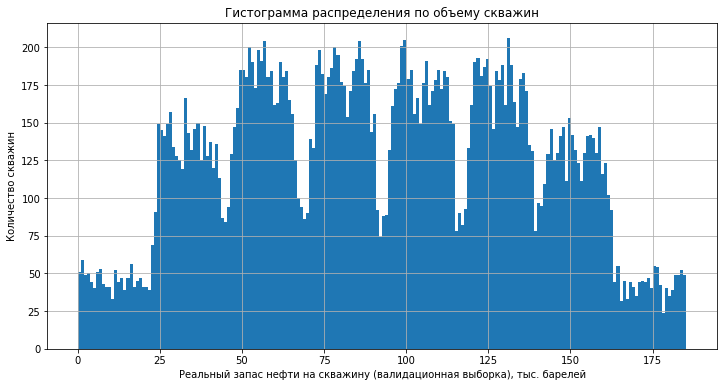

In [50]:
plt.figure(figsize=[12,6])
target_valid_geo_0.hist(bins=200)
plt.xlabel("Реальный запас нефти на скважину (валидационная выборка), тыс. барелей")
plt.ylabel("Количество скважин")
plt.title("Гистограмма распределения по объему скважин")
plt.show()

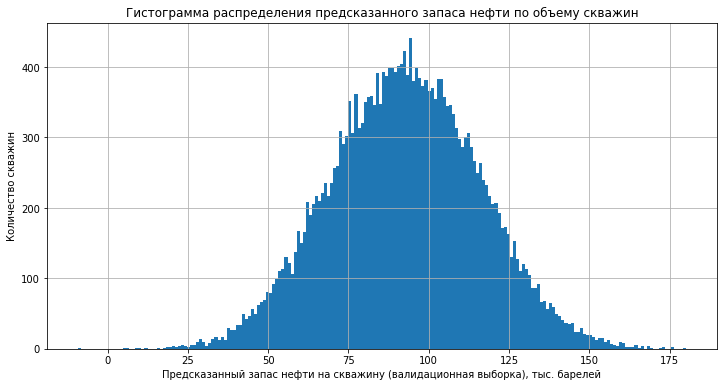

In [51]:
plt.figure(figsize=[12,6])
predictions_geo_0.hist(bins=200)
plt.xlabel("Предсказанный запас нефти на скважину (валидационная выборка), тыс. барелей")
plt.ylabel("Количество скважин")
plt.title("Гистограмма распределения предсказанного запаса нефти по объему скважин")
plt.show()

#### Месторождение 2 ####

In [52]:
model_geo_1 = LinearRegression()
model_geo_1 = model_geo_1.fit(features_train_geo_1, target_train_geo_1)

In [53]:
predictions_geo_1 = pd.Series(model_geo_1.predict(features_valid_geo_1))
RMSE_geo_1 = mean_squared_error(target_valid_geo_1, predictions_geo_1)**0.5
mean_preds_reserve_geo_1 = sum(predictions_geo_1)/ len(predictions_geo_1)
mean_valid_reserve_geo_1 = sum(target_valid_geo_1)/len(target_valid_geo_1)

In [54]:
print('Месторождение 2') 
print('RMSE {:.2f}'.format(RMSE_geo_1)) 
print('Средний предказанный запас сырья: {:.2f}'.format(mean_preds_reserve_geo_1), 'тыс. баррелей') 
print('Средний реальный запас сырья (валидационная выборка): {:.2f}'.format(mean_valid_reserve_geo_1), 'тыс. баррелей')

Месторождение 2
RMSE 0.89
Средний предказанный запас сырья: 68.73 тыс. баррелей
Средний реальный запас сырья (валидационная выборка): 68.72 тыс. баррелей


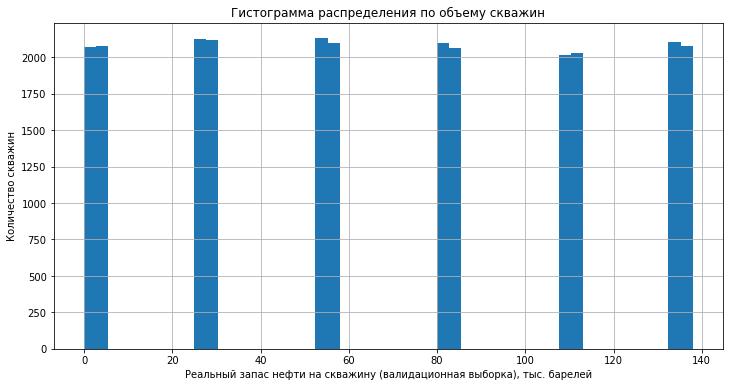

In [55]:
plt.figure(figsize=[12,6])
target_valid_geo_1.hist(bins=50)
plt.xlabel("Реальный запас нефти на скважину (валидационная выборка), тыс. барелей")
plt.ylabel("Количество скважин")
plt.title("Гистограмма распределения по объему скважин")
plt.show()

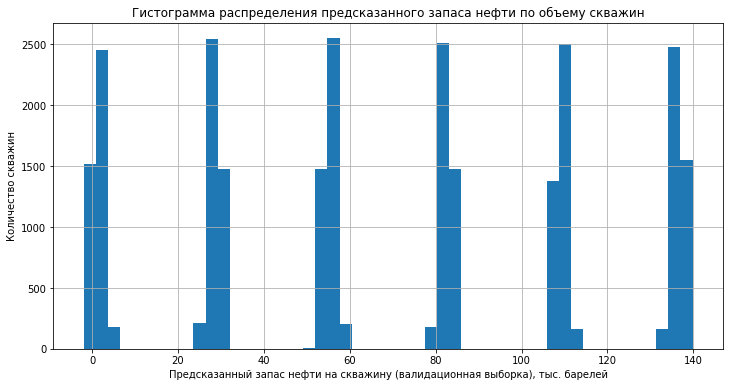

In [56]:
plt.figure(figsize=[12,6])
predictions_geo_1.hist(bins=50)
plt.xlabel("Предсказанный запас нефти на скважину (валидационная выборка), тыс. барелей")
plt.ylabel("Количество скважин")
plt.title("Гистограмма распределения предсказанного запаса нефти по объему скважин")
plt.show()

#### Месторождение 3 ####

In [57]:
model_geo_2 = LinearRegression()
model_geo_2 = model_geo_2.fit(features_train_geo_2, target_train_geo_2)

In [58]:
predictions_geo_2 = pd.Series(model_geo_2.predict(features_valid_geo_2))
RMSE_geo_2 = mean_squared_error(target_valid_geo_2, predictions_geo_2)**0.5
mean_preds_reserve_geo_2 = sum(predictions_geo_2)/ len(predictions_geo_2)
mean_valid_reserve_geo_2 = sum(target_valid_geo_2)/len(target_valid_geo_2)

In [59]:
print('Месторождение 3') 
print('RMSE {:.2f}'.format(RMSE_geo_2)) 
print('Средний предказанный запас сырья: {:.2f}'.format(mean_preds_reserve_geo_2), 'тыс. баррелей') 
print('Реальный запас сырья (валидационная выборка): {:.2f}'.format(mean_valid_reserve_geo_2), 'тыс. баррелей')

Месторождение 3
RMSE 40.03
Средний предказанный запас сырья: 94.97 тыс. баррелей
Реальный запас сырья (валидационная выборка): 94.88 тыс. баррелей


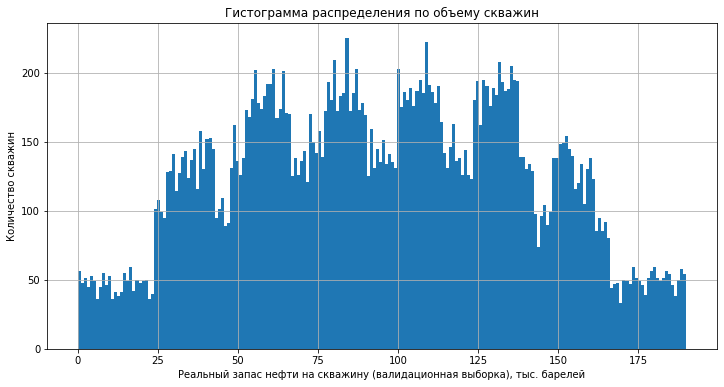

In [60]:
plt.figure(figsize=[12,6])
target_valid_geo_2.hist(bins=200)
plt.xlabel("Реальный запас нефти на скважину (валидационная выборка), тыс. барелей")
plt.ylabel("Количество скважин")
plt.title("Гистограмма распределения по объему скважин")
plt.show()

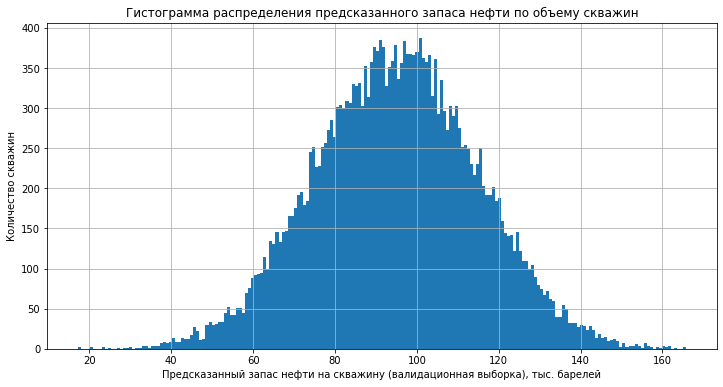

In [61]:
plt.figure(figsize=[12,6])
predictions_geo_2.hist(bins=200)
plt.xlabel("Предсказанный запас нефти на скважину (валидационная выборка), тыс. барелей")
plt.ylabel("Количество скважин")
plt.title("Гистограмма распределения предсказанного запаса нефти по объему скважин")
plt.show()

### Анализ результатов ###

Самый низкий показатель RMSE у Месторождение 2 (это говорит о том, что модель хорошо обучена). 

Однако  в данных об  именно этом месторождении есть более 8 % скважин с запасом 0.

думаю именно это повлияло на обучение модели и она скорее всего переобучена.

В п. 1.2 проекта подсчитан запас сырья по данному месторождению - он также ниже всех. 

Учитывая вышеизложенное, возможно стоит рассмотреть варианты исключения Месторождение 2 из списка потенциально прибыльных месторождений (но в любом случае по нему тоже будут проведены расчеты, как того требует задача).

Что касается Месторождения 1 и Месторождения 3, то  здесь значения RMSE, средний предсказанный запас и суммарный реальный запас  на валидационной выборке  - примерно одинаковы. Распределение предсказанного запаса - нормальное

## Подготовка к расчёту прибыли

Для начала сохраню в соотвествующие переменные экономические условия задачи

In [62]:
BUDJET = 10000000000
POINTS = 500
BEST_POINTS = 200
PRICE_PER_THOU_BARR = 450000  

### Расчёт достаточного объёма сырья для безубыточной разработки новой скважины ###

In [63]:
break_even = BUDJET / PRICE_PER_THOU_BARR

In [64]:
print('Объем сырья, достаточный для безубыточной разработки: {:.2f}'.format(break_even), 'тыс. баррелей')

Объем сырья, достаточный для безубыточной разработки: 22222.22 тыс. баррелей


In [65]:
barr_on_point = break_even / BEST_POINTS

In [66]:
print('Достаточный запас нефти на 1 скважине для безубыточной разработки: {:.2f}'.format(barr_on_point), 'тыс. баррелей')

Достаточный запас нефти на 1 скважине для безубыточной разработки: 111.11 тыс. баррелей


### Расчёт прибыли по выбранным скважинам и предсказаниям модели ###

Расчет будет производиться, исходя из 200 скважин, в которых больше запасов нефти.

Для этого объявлю функцию oil_profit, которя на вход принимает правильные ответы, предсказания). 

Предварительно в переменных, которые содержат правильные ответы, сброшу индексы (так как они "наследственные" и не совпадают с индексами массивов с предсказаниями) с помощью .reset_index(drop=true).

In [67]:
target_valid_geo_0 = target_valid_geo_0.reset_index(drop = True)
target_valid_geo_1 = target_valid_geo_1.reset_index(drop = True)
target_valid_geo_2 = target_valid_geo_2.reset_index(drop = True)

In [68]:
def oil_profit(target, predictions):
    preds_sorted = predictions.sort_values(ascending = False)
    target_selected = target[preds_sorted.index][:200]
    return PRICE_PER_THOU_BARR*target_selected.sum() - BUDJET

#### Вывод ####

Был произведен расчет (исходя из представленных экономических целей), согласно которому для безубыточной добычи нефти на 200 скважинах необходим:

- объем запасов на 1 скважине - 111.11 тыс. баррелей

- объем запасов на 1 месторождении - 22222.22 тыс. баррелей

Изучены средние предсказаные запасы на месторождениях и установлено, что месторождения 1 и 3 имеют разброс значений вокруг среднего 92.5 и 95, что близко к рассчитанной цели. 

Что касается месторождения 2. то среднее значения низкое, разброс значений далек от нормального,шанс достичь целевое значение есть, но на мой взгляд - низкий.

Также изучены реальный запас и в целом на каждом месторождении есть достаточный запас нефти для безубыточной добычи.

Создана функция по расчету прибыли, которая берет на вход предсказания и целевой признак. Функция работает

## Расчёт прибыли и рисков 

**Bootstrap с 1000 выборок, расчет средней прибыли, 95%-й доверительного интервала и рисков убытков**

In [69]:
state = np.random.RandomState(12345)
def bootstrap_int_risk(target, predictions):
    values = []
    #lost = 0
    for i in range(1000):
        target_subsample = target.sample(500, replace=True, random_state=state)
        preds_subsample = predictions[target_subsample.index]
        profit = oil_profit(target_subsample, preds_subsample)
        values.append(profit)
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean_profit = values.mean()
    risk = (values < 0).mean()
 
    return mean_profit,lower,upper, risk

In [70]:
mean_profit_0, lower_0, upper_0, risk_0 = bootstrap_int_risk(target_valid_geo_0, predictions_geo_0)

In [71]:
print('Информация по Месторождению 1')
print('Средняя прибыль: {:.2f}'.format(mean_profit_0), 'тыс. рублей')
print('95%-й доверительный интервал: от {:.2f} до {:.2f} тыс. рублей'.format(lower_0, upper_0))
print('Риск убытков: {:.2%}'.format(risk_0))

Информация по Месторождению 1
Средняя прибыль: 425938526.91 тыс. рублей
95%-й доверительный интервал: от -102090094.84 до 947976353.36 тыс. рублей
Риск убытков: 6.00%


In [72]:
mean_profit_1, lower_1, upper_1, risk_1 = bootstrap_int_risk(target_valid_geo_1, predictions_geo_1)

In [73]:
print('Информация по Месторождению 2')
print('Средняя прибыль: {:.2f}'.format(mean_profit_1), 'тыс. рублей')
print('95%-й доверительный интервал: от {:.2f} до {:.2f} тыс. рублей'.format(lower_1, upper_1))
print('Риск убытков: {:.2%}'.format(risk_1))

Информация по Месторождению 2
Средняя прибыль: 518259493.70 тыс. рублей
95%-й доверительный интервал: от 128123231.43 до 953612982.07 тыс. рублей
Риск убытков: 0.30%


In [74]:
mean_profit_2, lower_2, upper_2, risk_2 = bootstrap_int_risk(target_valid_geo_2, predictions_geo_2)

In [75]:
print('Информация по Месторождению 3')
print('Средняя прибыль: {:.2f}'.format(mean_profit_2), 'тыс. рублей')
print('95%-й доверительный интервал: от {:.2f} до {:.2f} тыс. рублей'.format(lower_2, upper_2))
print('Риск убытков: {:.2%}'.format(risk_2))

Информация по Месторождению 3
Средняя прибыль: 420194005.34 тыс. рублей
95%-й доверительный интервал: от -115852609.16 до 989629939.84 тыс. рублей
Риск убытков: 6.20%


## ОБЩИЙ ВЫВОД ##

Во время работы над проектом были проанализированы данные о 3-х месторождениях нефти.

Данные были проверены на наличие пропусков, полных дубликатов.

Была обучена модель Линейной регресии, получены средние значения предсказанных запасов и реальных запасов (в целом они были близки).

Метрика RMSE была самой низкой у Месторождения 2. В данных об этом Месторождении распределение признаков далеко от нормального, есть чуть более 8 % данных о скважинах с нулевым запасом (гистограмма распределения это показала тоже).

**Тем не менее, именно Месторасположение 2 я буду рекомендовать в качестве пригодного для  разработки и потенциально прибыльного, так как техника Bootstrap показала масксимальную среднюю прибыль у данного месторожения и риск убытков менее 2,5 %**